In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "brazil"        "brics-dataset"

In [2]:
library(tidyverse)
library(readr)

In [3]:
data <- read_csv("../input/brics-dataset/China.csv")

Rows: 10656 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): DEXCHUS
date (1): DATE


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
typeof(data)

[1] "list"

In [5]:
spec(data)

cols(
  DATE = col_date(format = ""),
  DEXCHUS = col_character()
)

In [6]:
del_data = data[data$DATE <= as.Date("1999-12-31", "%Y-%m-%d"), ] 
data = data[data$DATE > as.Date("1999-12-31", "%Y-%m-%d"), ]

In [7]:
data = data[data$DEXCHUS != '.', ]

In [8]:
lengths(data)

DATE DEXCHUS 
   5483    5483

In [9]:
data

DATE,DEXCHUS
<date>,<chr>
2000-01-03,8.2798
2000-01-04,8.2799
2000-01-05,8.2798
2000-01-06,8.2797
2000-01-07,8.2794
2000-01-10,8.2794
2000-01-11,8.2795
2000-01-12,8.2796
2000-01-13,8.2798


In [10]:
date1 = as.Date("1999-12-31", "%Y-%m-%d")
date2 = data$DATE[length(data$DATE)]     #lengthof data is 5482

In [11]:
length = date2 - date1 #7980
length

Time difference of 7980 days

In [12]:
lst_val = 1:length
lst_val <- as.double(lst_val)

In [13]:
check_date = as.Date("2000-01-01", "%Y-%m-%d")
start_val = del_data$DEXCHUS[length(del_data$DATE)]

In [14]:
if(check_date != data$DATE[1]){
    num_missing = data$DATE[1] - check_date
    val = as.numeric(start_val) + as.numeric(data$DEXCHUS[1])
    val = val/2
    for(i in 1:num_missing){
        lst_val[i] = val
    }
    check_date <- check_date + num_missing
}

In [15]:
lst_val[3]

[1] 3

In [16]:
idx = 3
for (i in 1:length(data$DATE)){    
    if(check_date != data$DATE[i]){
        num_missing <- data$DATE[i] - check_date
        val <- as.numeric(data$DEXCHUS[i-1]) + as.numeric(data$DEXCHUS[i])
        val <- val/2
        for(j in (idx : (idx + as.numeric(num_missing-1)))){
#             print(j)
            lst_val[j] <- val
        }
        
        idx <- idx + as.numeric(num_missing)
        lst_val[idx] <- as.numeric(data$DEXCHUS[i])
        idx <- idx + 1
        check_date <- check_date + num_missing + 1
#         print(check_date)
    }
    
    else{
        lst_val[idx] <- as.numeric(data$DEXCHUS[i])
        idx <- idx + 1
        check_date <- check_date + 1
    }
}

In [17]:
lst_val

[1] 8.27965 8.27965 8.27980 8.27990 8.27980 8.27970 8.27940 8.27940 8.27940
  [10] 8.27940 8.27950 8.27960 8.27980 8.27970 8.27950 8.27950 8.27950 8.27930
  [19] 8.27970 8.27940 8.27950 8.27920 8.27920 8.27890 8.27860 8.27820 8.27830
  [28] 8.27810 8.27790 8.27790 8.27770 8.27740 8.27730 8.27810 8.27880 8.27880
  [37] 8.27880 8.27880 8.27880 8.27880 8.27880 8.27880 8.27835 8.27835 8.27790
  [46] 8.27770 8.27770 8.27720 8.27720 8.27725 8.27725 8.27725 8.27730 8.27800
  [55] 8.27800 8.27860 8.27860 8.27860 8.27860 8.27860 8.27860 8.27870 8.27890
  [64] 8.27870 8.27870 8.27850 8.27840 8.27860 8.27870 8.27850 8.27830 8.27830
  [73] 8.27810 8.27800 8.27780 8.27770 8.27850 8.27855 8.27855 8.27860 8.27830
  [82] 8.27830 8.27870 8.27890 8.27905 8.27905 8.27920 8.27950 8.27890 8.27880
  [91] 8.27870 8.27865 8.27865 8.27860 8.27910 8.27950 8.27950 8.27950 8.27965
 [100] 8.27965 8.27980 8.27910 8.27960 8.27940 8.27940 8.27940 8.27940 8.27940
 [109] 8.27900 8.27930 8.27910 8.27850 8.27855 8.27855 8.27860 8.27910 8.27950
 [118] 8.27980 8.27990 8.27990 8.27990 8.27990 8.27990 8.27990 8.27990 8.27990
 [127] 8.27985 8.27985 8.27980 8.27900 8.27850 8.27820 8.27780 8.27775 8.27775
 [136] 8.27770 8.27720 8.27680 8.27730 8.27680 8.27690 8.27690 8.27700 8.27680
 [145] 8.27690 8.27730 8.27710 8.27715 8.27715 8.27715 8.27720 8.27730 8.27710
 [154] 8.27710 8.27705 8.27705 8.27700 8.27730 8.27730 8.27750 8.27720 8.27715
 [163] 8.27715 8.27710 8.27700 8.27680 8.27680 8.27680 8.27680 8.27680 8.27680
 [172] 8.27720 8.27720 8.27710 8.27690 8.27710 8.27710 8.27730 8.27740 8.27750
 [181] 8.27800 8.27820 8.27840 8.27840 8.27860 8.27865 8.27870 8.27910 8.27930
 [190] 8.27940 8.27940 8.27950 8.27940 8.27950 8.27910 8.27960 8.27935 8.27935
 [199] 8.27910 8.27960 8.27960 8.27960 8.27950 8.27965 8.27965 8.27980 8.27970
 [208] 8.27960 8.27930 8.27940 8.27930 8.27930 8.27920 8.27880 8.27910 8.27960
 [217] 8.27980 8.27985 8.27985 8.27990 8.27990 8.27980 8.27990 8.27960 8.27955
 [226] 8.27955 8.27950 8.27880 8.27970 8.27990 8.27970 8.27980 8.27980 8.27990
 [235] 8.27990 8.27930 8.27990 8.27990 8.27990 8.27990 8.27990 8.27990 8.27880
 [244] 8.27860 8.27870 8.27885 8.27885 8.27885 8.27900 8.27940 8.27900 8.27940
 [253] 8.27900 8.27900 8.27860 8.27870 8.27700 8.27730 8.27710 8.27715 8.27715
 [262] 8.27720 8.27790 8.27750 8.27780 8.27870 8.27900 8.27900 8.27930 8.27910
 [271] 8.27950 8.27990 8.27980 8.27940 8.27940 8.27900 8.27900 8.27900 8.27900
 [280] 8.27900 8.27895 8.27895 8.27895 8.27890 8.27860 8.27860 8.27840 8.27825
 [289] 8.27825 8.27810 8.27840 8.27810 8.27800 8.27780 8.27810 8.27810 8.27840
 [298] 8.27840 8.27820 8.27850 8.27880 8.27840 8.27840 8.27800 8.27750 8.27730
 [307] 8.27700 8.27680 8.27695 8.27695 8.27710 8.27690 8.27720 8.27680 8.27720
 [316] 8.27700 8.27700 8.27680 8.27730 8.27680 8.27730 8.27690 8.27740 8.27740
 [325] 8.27790 8.27860 8.27820 8.27805 8.27790 8.27795 8.27795 8.27800 8.27770
 [334] 8.27740 8.27770 8.27750 8.27730 8.27730 8.27710 8.27700 8.27700 8.27700
 [343] 8.27690 8.27710 8.27710 8.27730 8.27710 8.27700 8.27680 8.27680 8.27710
 [352] 8.27710 8.27740 8.27720 8.27690 8.27680 8.27770 8.27730 8.27730 8.27730
 [361] 8.27690 8.27700 8.27810 8.27740 8.27765 8.27765 8.27765 8.27790 8.27730
 [370] 8.27810 8.27750 8.27765 8.27765 8.27780 8.27710 8.27690 8.27670 8.27680
 [379] 8.27670 8.27670 8.27670 8.27660 8.27640 8.27640 8.27640 8.27730 8.27730
 [388] 8.27820 8.27860 8.27860 8.27860 8.27860 8.27860 8.27860 8.27860 8.27860
 [397] 8.27810 8.27720 8.27740 8.27720 8.27720 8.27700 8.27660 8.27650 8.27630
 [406] 8.27640 8.27690 8.27690 8.27740 8.27650 8.27640 8.27720 8.27700 8.27685
 [415] 8.27685 8.27685 8.27670 8.27720 8.27690 8.27740 8.27750 8.27750 8.27760
 [424] 8.27810 8.27830 8.27780 8.27820 8.27795 8.27795 8.27770 8.27780 8.27730
 [433] 8.27700 8.27740 8.27790 8.27790 8.27840 8.27830 8.27780 8.27760 8.27710
 [442] 8.27715 8.27715 8.27720 8.27720 8.27710 8.27680 8.27730 8.27720 8.27720
 [451] 8.27710 8.27730 8.27770 8.27790 8.27770 8.2776

In [18]:
print("Enter 0 if you want the test data to start from 2020 and 1 if you want the test data to start from 2021")
offset = readline()
offset = as.integer(offset)

[1] "Enter 0 if you want the test data to start from 2020 and 1 if you want the test data to start from 2021"


 1


In [19]:
test_date = as.Date("2021-01-01", "%Y-%m-%d")
if(offset == 0){
    test_date = as.Date("2020-01-01", "%Y-%m-%d")
}

In [20]:
train = lst_val[1: as.numeric(test_date - date1) - 1]

In [21]:
test = lst_val[as.numeric(test_date - date1) : length(lst_val)]

In [22]:
train_week <- list(1 : ceiling(length(train)/7))
for(i in 0 : as.integer(length(train)/7)){
    if(i == as.integer(length(train)/7)){
        train_week[i+1] <- mean(train[((7*i)+1) : (length(train))])
        next
    }

    train_week[i+1] <- mean(train[((7*i)+1) : ((7*i)+7)])
}

In [23]:
test_week <- list(1 : ceiling(length(test)/7))

for(i in 0 : as.integer(length(test)/7)){
    if(i == as.integer(length(test)/7)){
        test_week[i+1] <- mean(test[((7*i)+1) : (length(test))])
        next
    }

    test_week[i+1] <- mean(test[((7*i)+1) : ((7*i)+7)])
}

In [24]:
train <- ts(as.numeric(train_week))
test <- ts(as.numeric(test_week), start = length(train_week)+1,
           end = (length(train_week) + length(test_week)))
#converting to time series

In [25]:
install.packages("WaveletArima")
library(WaveletArima)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [26]:
library(tseries)
library(forecast)
library(Metrics)
library(ggplot2)
library(readr)
# library(WaveletArima)
library(stringi)
library(caret)
library(nnfor)
library(tsDyn)
library(fracdiff)
library(bsts)
library(forecastHybrid)
library(e1071)
library(tseriesChaos)
library(pracma)
library(Kendall)
# library(nonlinearTseries)
# library(GeneCycle)
library(fpp2)


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Registered S3 method overwritten by 'greybox':
  method     from
  print.pcor lava


Attaching package: ‘tsDyn’


The following object is masked from ‘package:Metrics’:

    mse


Loading required package: BoomSpikeSlab

Loading required package: Boom

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘Boom’


The following object is masked from ‘package:stats’:

    rWishart



Attaching package: ‘BoomSpikeSlab’


The following object is masked from ‘package:stats’:

    knots


Loading required package: zoo


A

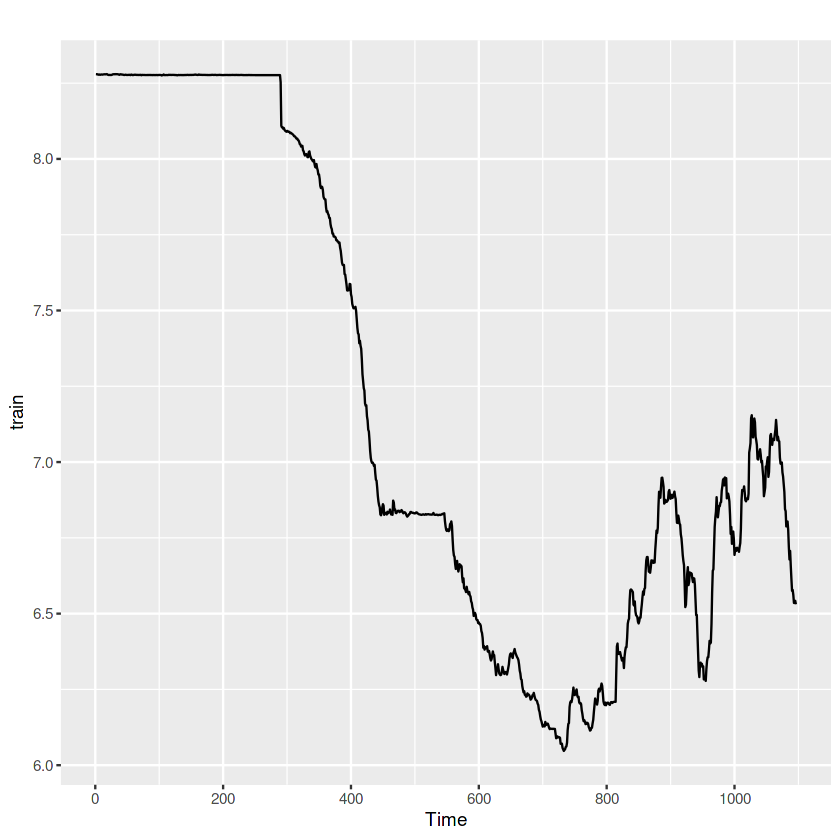

In [27]:
autoplot(train)

In [28]:
#ACF & PACF plots
#diffcase=ndiffs(train)
diffset = diff(train, differences = ndiffs(train))

jpeg(file="ACF_China.jpeg")
ggAcf(diffset) +
  ggtitle("ACF plot")
dev.off()

jpeg(file="PACF_China.jpeg")

ggPacf(train) +
  ggtitle("PACF plot")
dev.off()

png 
  2

png 
  2

In [29]:
kpss.test(train)  #p value is < 0.05... So,reject null hypothesis and accept alternative hypothisis which is non stationary 

Warning message in kpss.test(train):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  train
KPSS Level = 10.67, Truncation lag parameter = 7, p-value = 0.01


In [30]:
Box.test(train)  #p<0.01... So, no seriel correlation exists


	Box-Pierce test

data:  train
X-squared = 1092.9, df = 1, p-value < 2.2e-16


In [31]:
skewness(train)   #Right Skew

[1] 0.3018282

In [32]:
kurtosis(train)   #Peaked distribution

[1] -1.510821

In [33]:
hurstexp(train)  #Which exponent to consider  #Emperical

Simple R/S Hurst estimation:         0.8874953 
Corrected R over S Hurst exponent:   1.042286 
Empirical Hurst exponent:            1.02424 
Corrected empirical Hurst exponent:  1.004328 
Theoretical Hurst exponent:          0.5381524 


In [34]:
terasvirta.test(train) 
#Also a test for linearity... p-value is greater than 0.05, hence linear trend


	Teraesvirta Neural Network Test

data:  train
X-squared = 21.256, df = 2, p-value = 2.423e-05


In [35]:
#Non-Chaotic
max_lyapunov_expo <-lyap_k(train, m=1, d=2, s=1, t=4, ref=length(train), k=2, eps=4); max_lyapunov_expo

Finding nearests
Keeping  1096  reference points
Following points


A Time Series:
[1] -Inf

# **Models**

In [36]:
library(lmtest)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1  0.838420   0.069900 11.9945 < 2.2e-16 ***
ma1 -0.475780   0.075172 -6.3292 2.464e-10 ***
ma2 -0.245540   0.042139 -5.8269 5.645e-09 ***
ma3  0.016868   0.035819  0.4709   0.63770    
ma4  0.080390   0.033727  2.3836   0.01715 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Series: train 
ARIMA(1,1,4) 

Coefficients:
         ar1      ma1      ma2     ma3     ma4
      0.8384  -0.4758  -0.2455  0.0169  0.0804
s.e.  0.0699   0.0752   0.0421  0.0358  0.0337

sigma^2 estimated as 0.0002862:  log likelihood=2915.62
AIC=-5819.24   AICc=-5819.17   BIC=-5789.25

Training set error measures:
                        ME       RMSE         MAE          MPE      MAPE
Training set -0.0006918862 0.01687232 0.009281624 -0.009317774 0.1370696
                  MASE         ACF1
Training set 0.9332313 -0.002529994

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.0006918862,0.01687232,0.009281624,-0.009317774,0.1370696,0.9332313,-0.002529994,NA
Test set,-0.0370014531,0.05414692,0.045531225,-0.576320168,0.7066295,4.5779884,0.845633757,2.723598


[1] 0.00703568

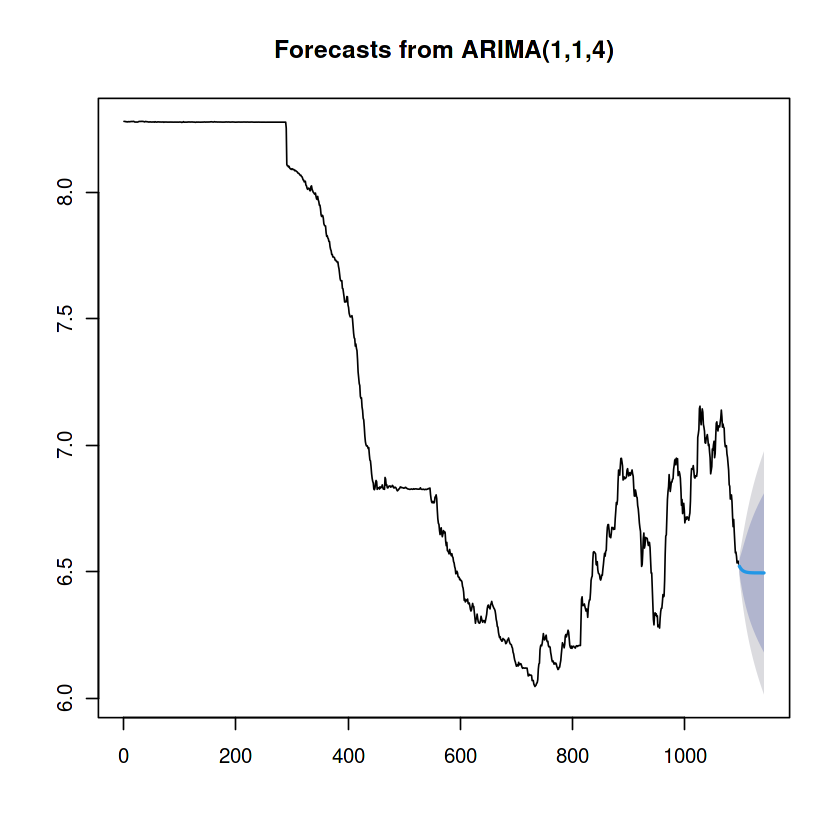

In [37]:
#ARIMA - Classical
fitARIMA = auto.arima(train) 
coeftest(fitARIMA)
summary(fitARIMA)
predARIMA = forecast::forecast(fitARIMA,h=length(test))
plot(predARIMA)

a1<-forecast::accuracy(predARIMA, test);a1
smape(test,predARIMA$mean)

In [38]:
# lag = stri_count(toString(summary(fitARIMA)[1]), fixed="ar")

ETS(A,Ad,N) 

Call:
 ets(y = train) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.3359 
    phi   = 0.8 

  Initial states:
    l = 8.2644 
    b = 0.0136 

  sigma:  0.0174

      AIC      AICc       BIC 
-1207.711 -1207.634 -1177.714 

Training set error measures:
                        ME       RMSE         MAE          MPE      MAPE
Training set -0.0007044841 0.01731558 0.009573462 -0.009482708 0.1413773
                  MASE       ACF1
Training set 0.9625745 0.08075503

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.0007044841,0.01731558,0.009573462,-0.009482708,0.1413773,0.9625745,0.08075503,NA
Test set,-0.0487449364,0.06294624,0.054507998,-0.758100823,0.8460636,5.4805681,0.84713738,3.169996


[1] 0.008415744

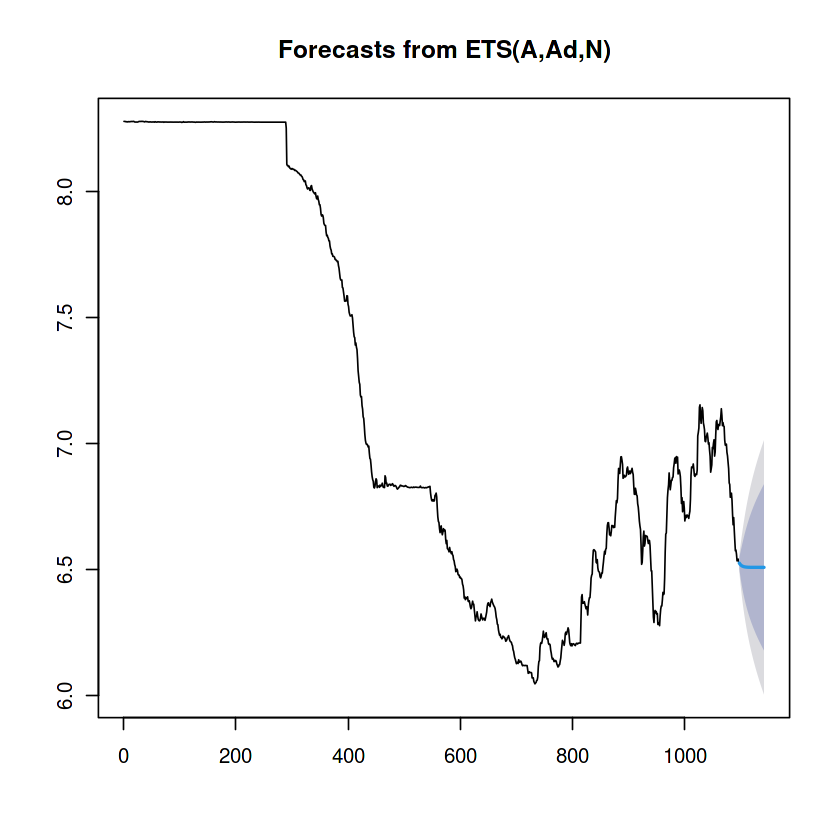

In [39]:
# fitting ETS  -- Smoothing Basic
fitETS=ets(train)
summary(fitETS)
predETS=forecast::forecast(fitETS, h=length(test))
plot(predETS)

a2<-forecast::accuracy(predETS, test);a2
smape(test,predETS$mean)


 1 T: Trim not respected:  0.8507326 0.1492674 from th: 8.276914

Warning message:
“Possible unit root in the high  regime. Roots are: 0.1707 1.1584 2.8245 2.8245”


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.05017863,0.06287149,0.05483546,-0.7800663,0.8511267,0.8400399,3.165765


[1] 0.008465688

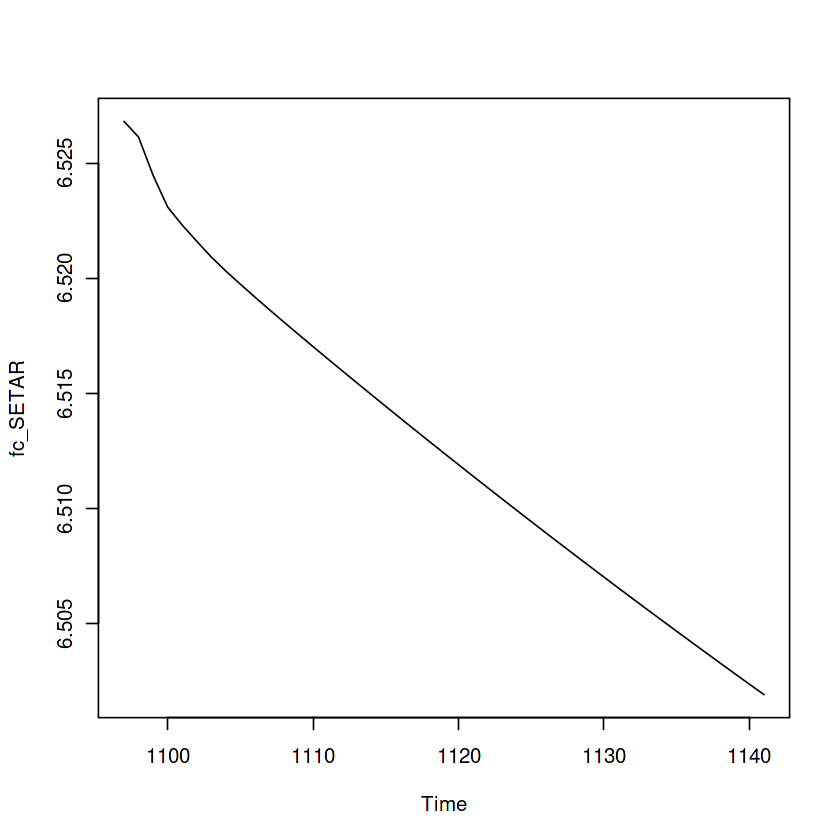

In [40]:
#SETAR - Classical
fit_SETAR = setar(train, m=4)
fc_SETAR = predict(fit_SETAR, n.ahead = length(test))
plot(fc_SETAR)
#How to determine M?

a3<-forecast::accuracy(fc_SETAR, test);a3
smape(test, fc_SETAR)

                  Length Class  Mode     
lambda               0   -none- NULL     
alpha                1   -none- numeric  
beta                 1   -none- numeric  
damping.parameter    1   -none- numeric  
gamma.values         0   -none- NULL     
ar.coefficients      0   -none- NULL     
ma.coefficients      0   -none- NULL     
likelihood           1   -none- numeric  
optim.return.code    1   -none- numeric  
variance             1   -none- numeric  
AIC                  1   -none- numeric  
parameters           2   -none- list     
seed.states          2   -none- numeric  
fitted.values     1096   ts     numeric  
errors            1096   ts     numeric  
x                 2192   -none- numeric  
seasonal.periods     0   -none- NULL     
y                 1096   ts     numeric  
call                 2   -none- call     
series               1   -none- character
method               1   -none- character

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.0006518314,0.01693228,0.009285982,-0.008723998,0.1372031,0.9336696,-0.01159611,NA
Test set,0.0018581650,0.03970232,0.034255463,0.025539393,0.5296222,3.4442541,0.84242772,1.969608


[1] 0.005297999

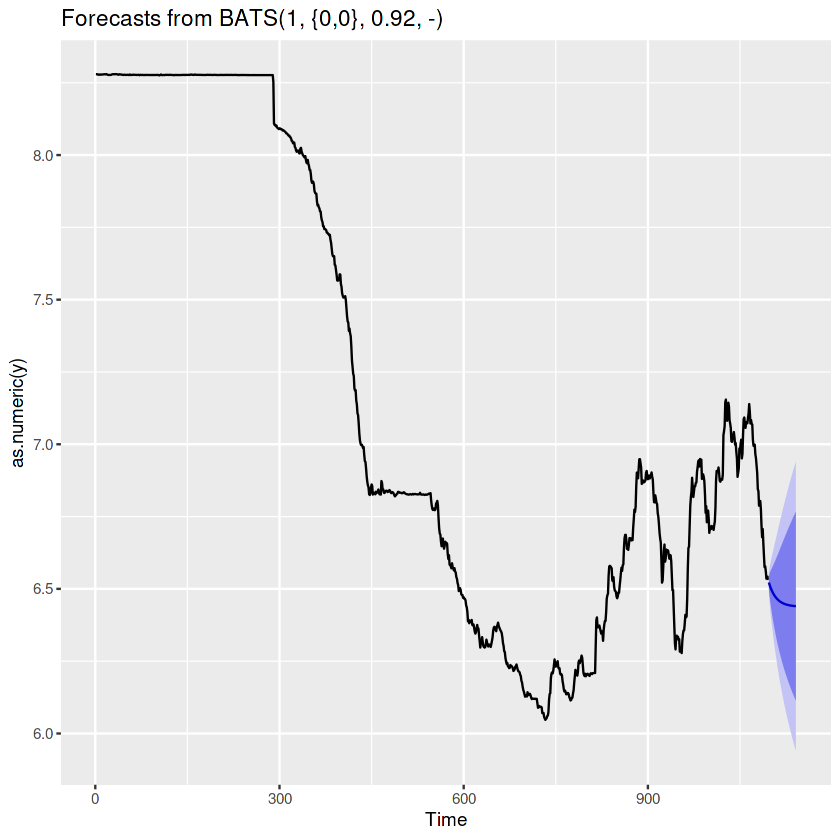

In [41]:
#TBATS - Smotthing
fit_tbats = tbats(train)
summary(fit_tbats)
predTBATS=forecast::forecast(fit_tbats, h=length(test))
autoplot(predTBATS)

a4<-forecast::accuracy(predTBATS, test);a4
smape(test,predTBATS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.04457343,0.05758949,0.04930818,-0.6930477,0.7652981,0.8368665,2.89221


[1] 0.007615107

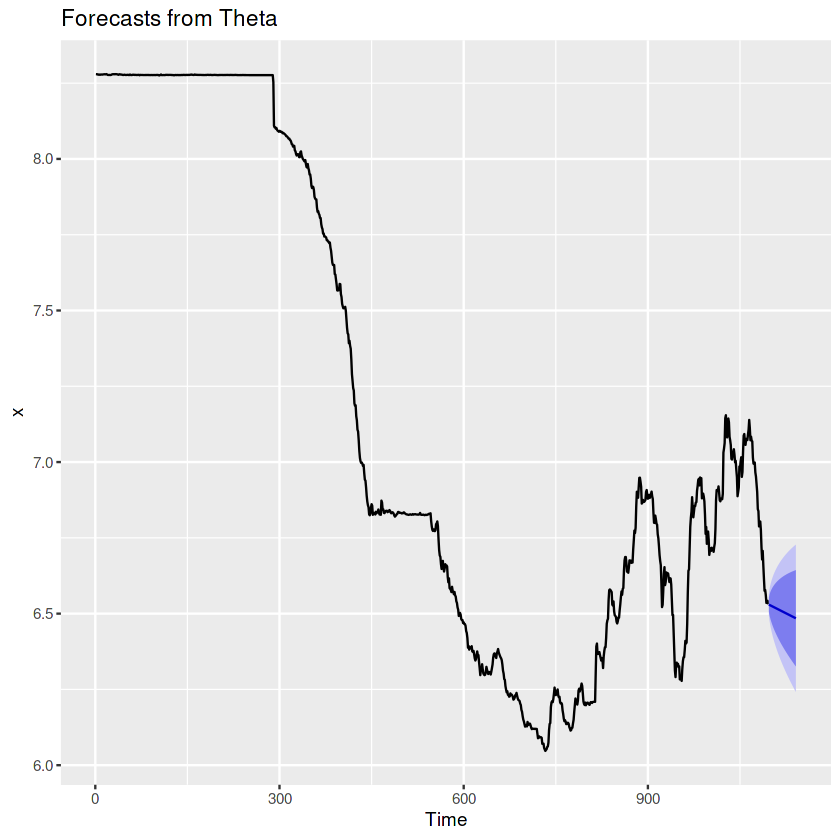

In [42]:
#Theta -- Smotthing
fit_theta=thetaf(train, h=length(test))
autoplot(fit_theta)

a5<-forecast::accuracy(fit_theta$mean, test);a5
smape(test,fit_theta$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.2777484,0.2919359,0.2777484,-4.303722,4.303722,0.8757399,14.76289


[1] 0.04203697

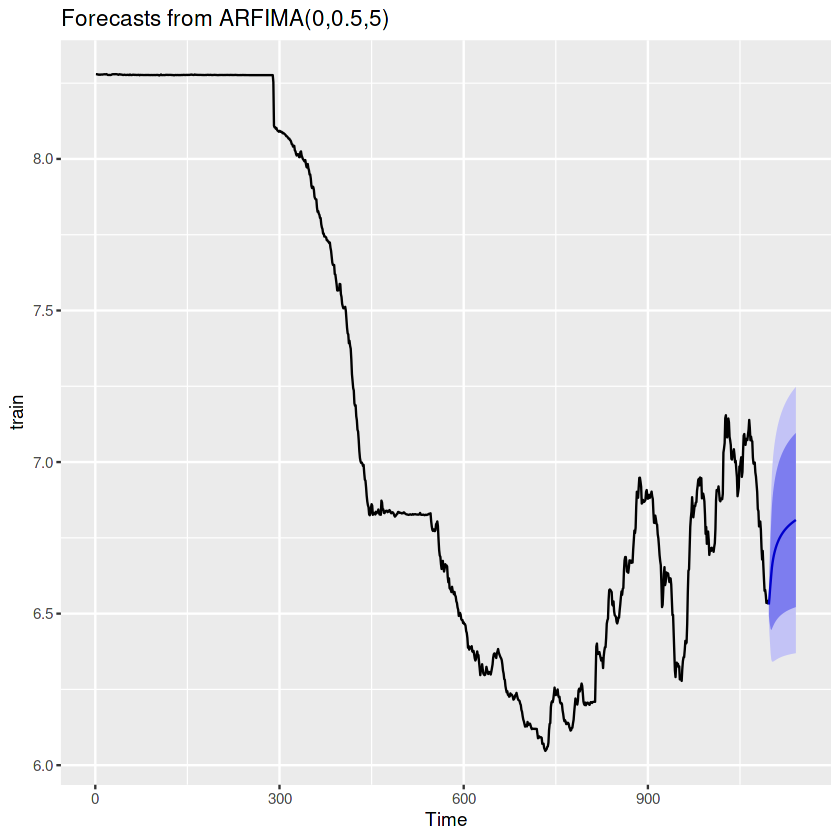

In [43]:
#ARFIMA model -- Classical
fit_ARFIMA=arfima(train)
predARFIMA = forecast::forecast(fit_ARFIMA, h=length(test))
autoplot(predARFIMA)

a6<-forecast::accuracy(predARFIMA$mean, test);a6
smape(test,predARFIMA$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.007661323,0.04064983,0.03554214,0.1153563,0.5492478,0.8455615,2.020966


[1] 0.005498682

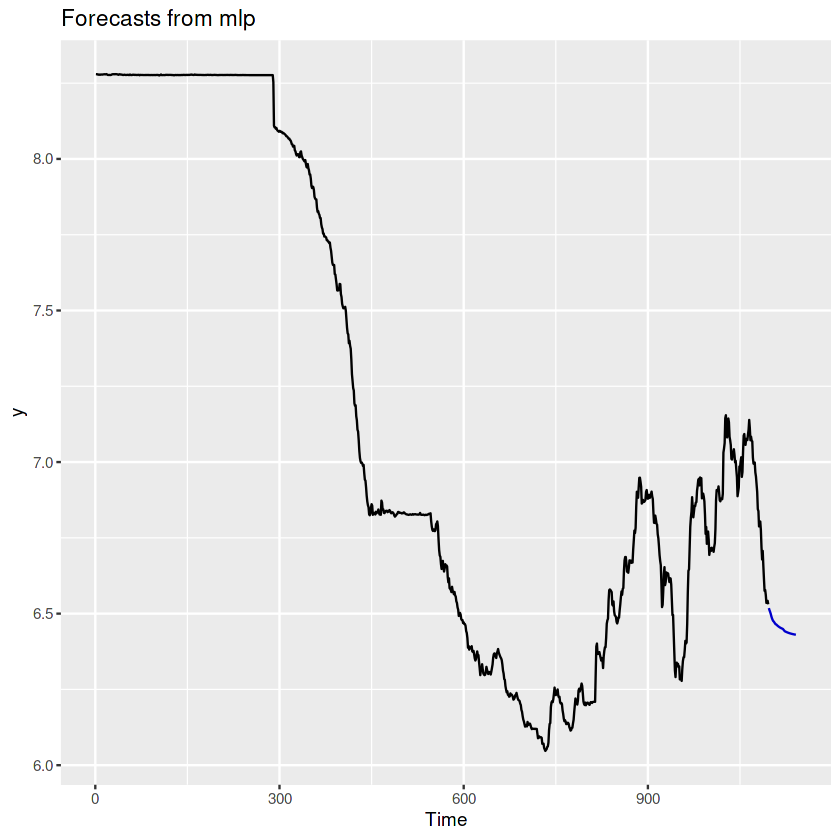

In [44]:
#fitting ANN -- ML Model
fit_ANN = mlp(train)
predANN = forecast::forecast(fit_ANN, h=length(test))
autoplot(predANN)

a7<-forecast::accuracy(predANN$mean, test);a7
smape(test,predANN$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.08147664,0.09389858,0.08366897,-1.265153,1.298596,0.8658266,4.745366


[1] 0.01288082

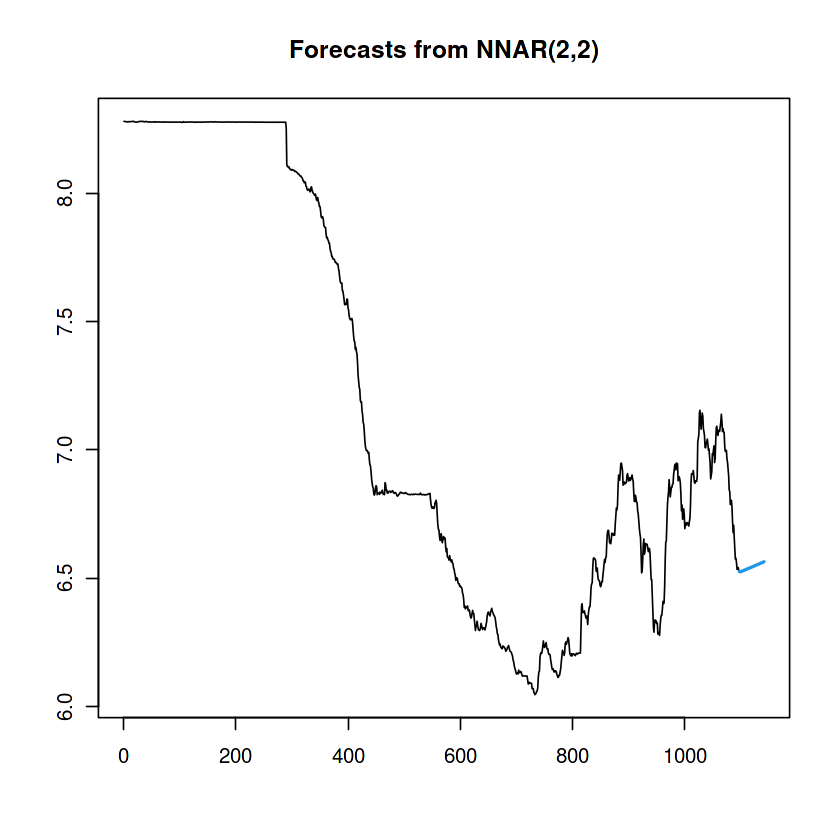

In [45]:
#fitting ARNN model -- ML Model
fit_ARNN = nnetar(train)
predARNN=forecast::forecast(fit_ARNN, h= length(test))
plot(predARNN)

a8<-forecast::accuracy(predARNN$mean, test);a8
smape(test, predARNN$mean)

Warning message in preprocess(y, m, lags, keep, difforder, sel.lag, allow.det.season, :
“No inputs left in the network after pre-selection, forcing AR(1).”


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.03571035,0.05327275,0.04464139,-0.5563415,0.6927989,0.8456388,2.68011


[1] 0.006898767

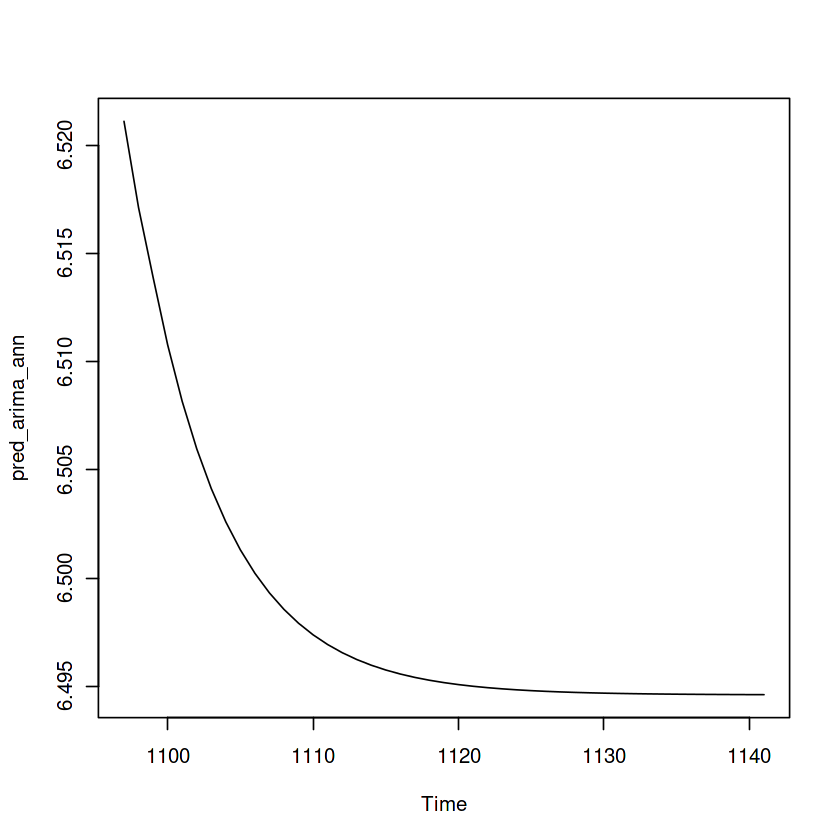

In [46]:
#fitting ARIMA + ANN hyybrid
fit_res_ANN=mlp(fitARIMA$residuals)
pred_res_ANN = forecast::forecast(fit_res_ANN, h=length(test))
pred_arima_ann=predARIMA$mean+pred_res_ANN$mean
plot(pred_arima_ann)

a9<-forecast::accuracy(pred_arima_ann, test);a9
smape(test,pred_arima_ann)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.03615847,0.05357441,0.04495052,-0.5632756,0.6976035,0.8456335,2.69508


[1] 0.006946333

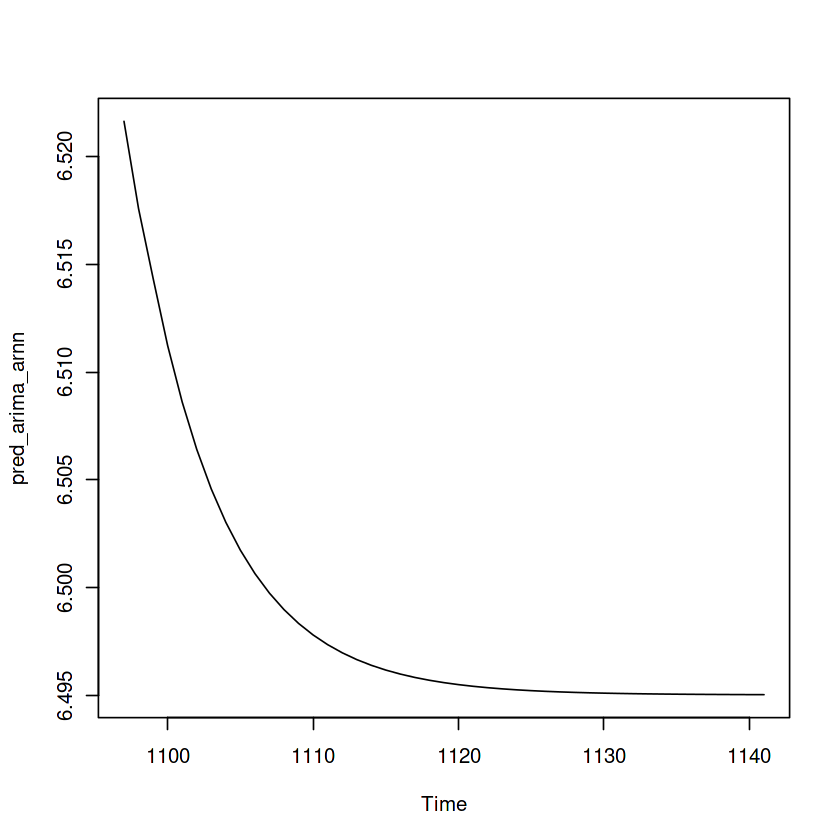

In [47]:
#fitting ARIMA + ARNN hybrid
fit_res_ARNN=nnetar(fitARIMA$residuals)
pred_res_ARNN = forecast::forecast(fit_res_ARNN, h=length(test))
pred_arima_arnn=predARIMA$mean+pred_res_ARNN$mean
plot(pred_arima_arnn)

a10<-forecast::accuracy(pred_arima_arnn, test);a10
smape(test,pred_arima_arnn)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.03693387,0.05322377,0.04443689,-0.5751471,0.6897256,0.8418173,2.679208


[1] 0.006867201

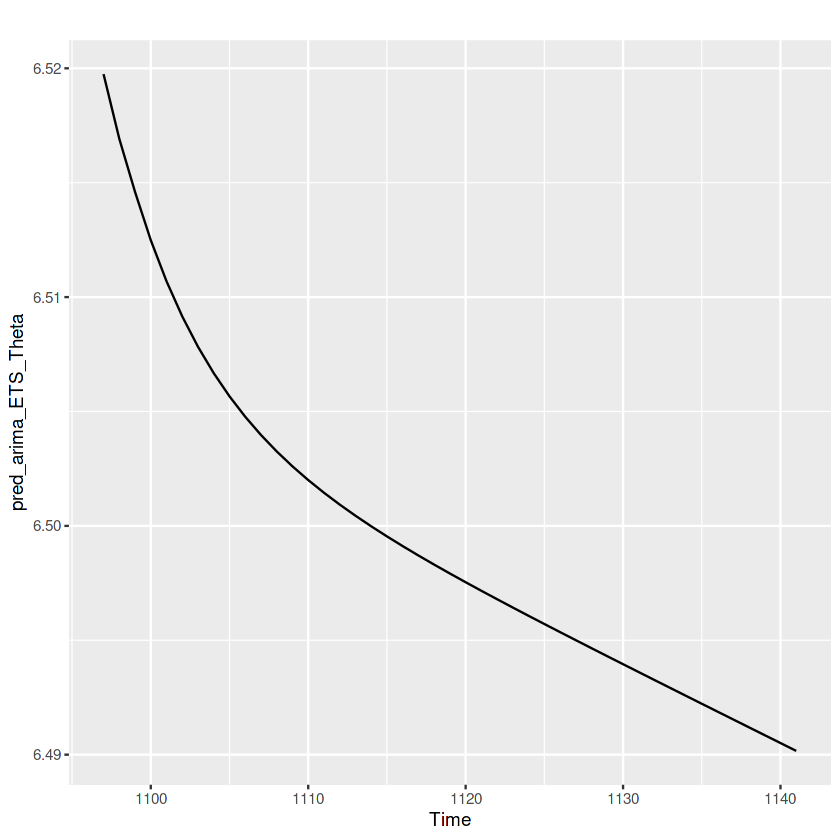

In [48]:
#ARIMA+ETS+THETA
pred_arima_ETS_Theta = ((0.333*predARIMA$mean) + (0.333*predETS$mean) + (0.333*fit_theta$mean))
autoplot(pred_arima_ETS_Theta)

a11<-forecast::accuracy(pred_arima_ETS_Theta, test);a11
smape(test,pred_arima_ETS_Theta)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.04922264,0.06434884,0.05537848,-0.7656582,0.8596252,0.8523235,3.24833


[1] 0.00854951

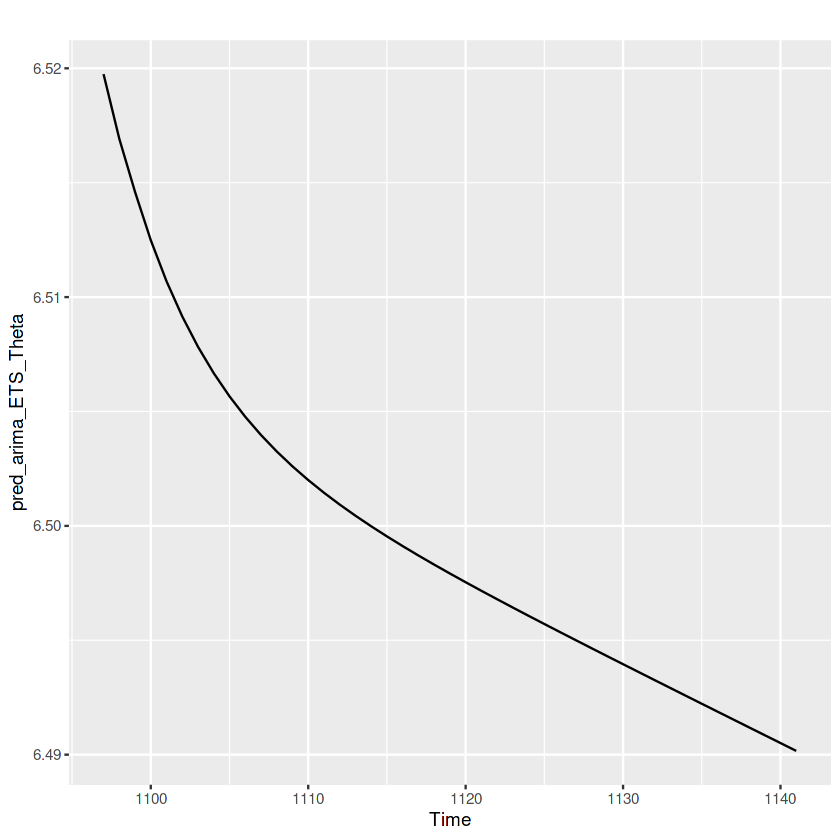

In [49]:
#ARIMA+ETS+ARNN
pred_arima_ETS_ARNN = ((0.333*predARIMA$mean) + (0.333*predETS$mean) + (0.333*predARNN$mean))
autoplot(pred_arima_ETS_Theta)

a12<-forecast::accuracy(pred_arima_ETS_ARNN, test);a12
smape(test,pred_arima_ETS_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.04783352,0.06216569,0.05361027,-0.7439955,0.8321676,0.8462861,3.136119


[1] 0.008277958

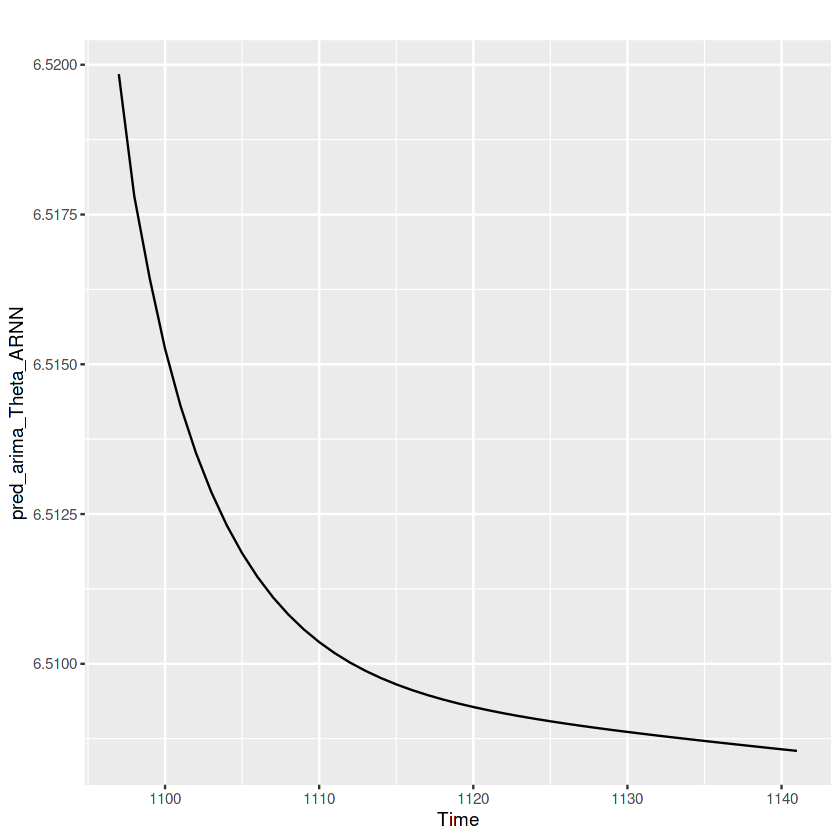

In [50]:
#ARIMA+theta+ARNN
pred_arima_Theta_ARNN = ((0.333*predARIMA$mean) + (0.333*fit_theta$mean) + (0.333*predARNN$mean))
autoplot(pred_arima_Theta_ARNN)

a13<-forecast::accuracy(pred_arima_Theta_ARNN, test);a13
smape(test,pred_arima_Theta_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.0517441,0.06532086,0.05683534,-0.8045285,0.8822239,0.8468368,3.295873


[1] 0.008773205

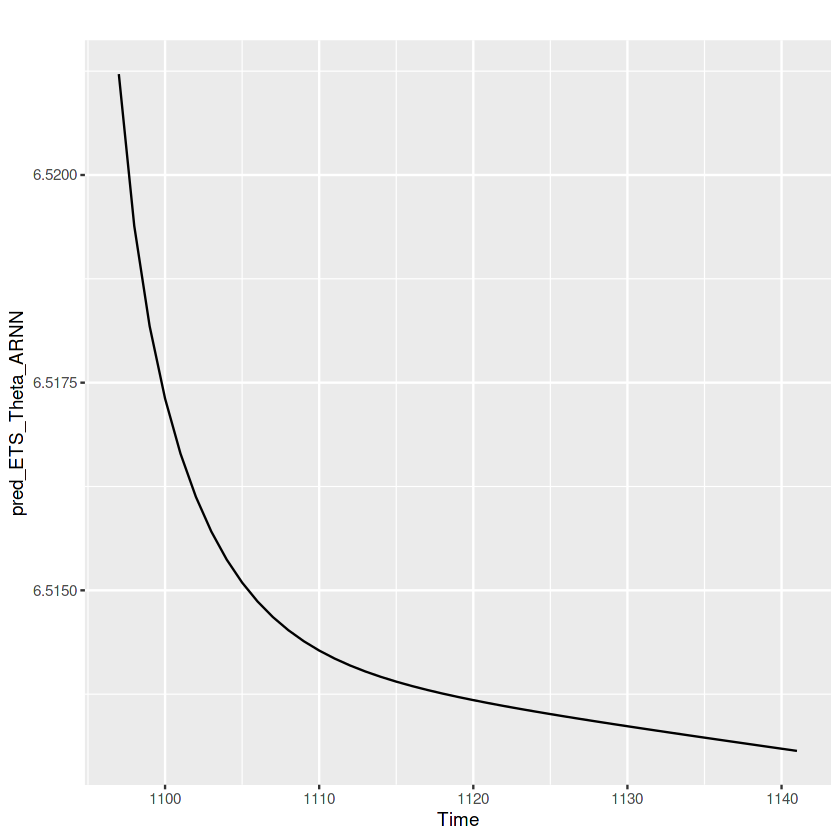

In [51]:
#ETS+theta+ARNN
pred_ETS_Theta_ARNN = ((0.333*predETS$mean) + (0.333*fit_theta$mean) + (0.333*predARNN$mean))
autoplot(pred_ETS_Theta_ARNN)

a14<-forecast::accuracy(pred_ETS_Theta_ARNN, test);a14
smape(test,pred_ETS_Theta_ARNN)

In [52]:
#ANN+ARNN+WARIMA

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.1196514,0.1315303,0.1196514,-1.853993,1.853993,0.8928444,6.643831


[1] 0.01833426

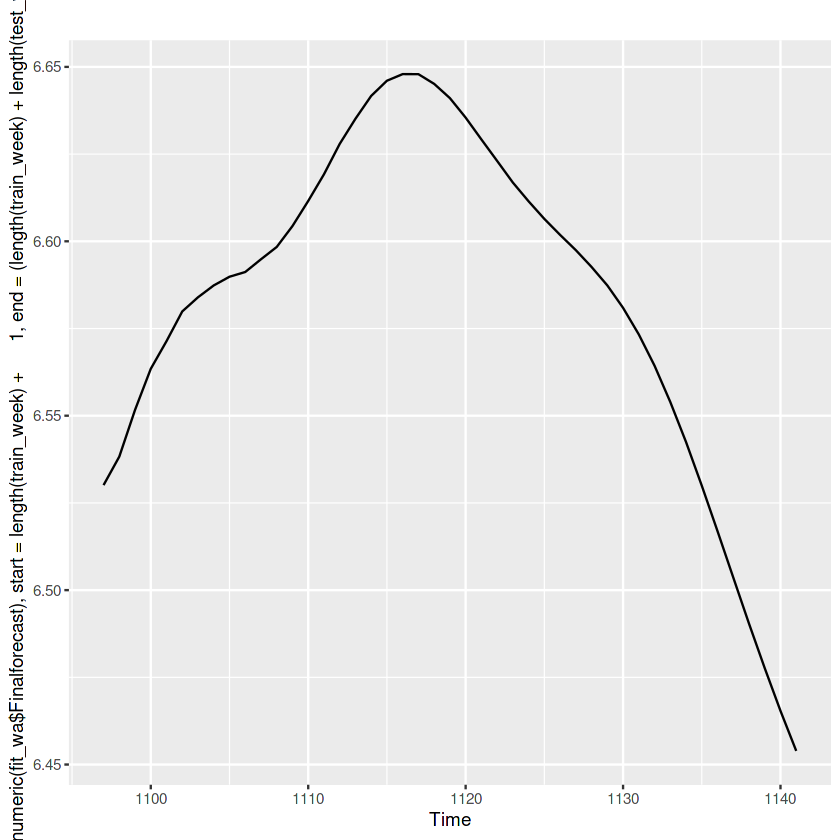

In [53]:
#WaveletArima -- Advanced
fit_wa <- WaveletFittingarma(train, Waveletlevels = floor(log(length(train))), boundary = 'periodic', FastFlag = TRUE, MaxARParam = 5, MaxMAParam = 5, NForecast = length(test))
autoplot(ts(as.numeric(fit_wa$Finalforecast), start = length(train_week)+1, end = (length(train_week) + length(test_week))))

a15<-forecast::accuracy(fit_wa$Finalforecast, test);a15
smape(test,fit_wa$Finalforecast)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.1065801,0.1199239,0.1065801,-1.651588,1.651588,0.8928072,6.061072


[1] 0.01634472

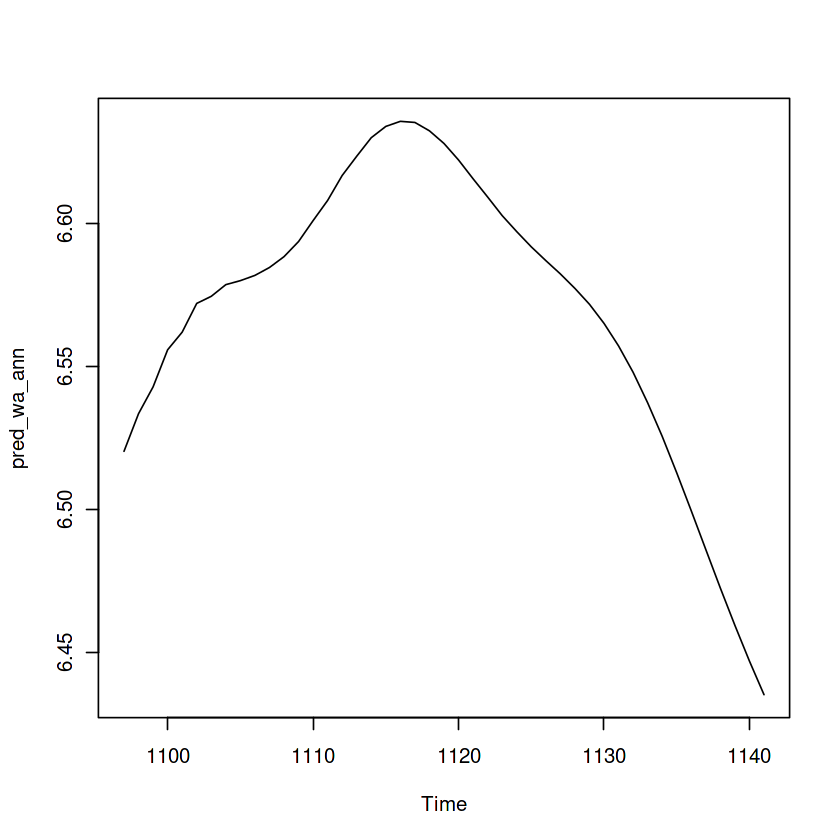

In [54]:
#fitting WARIMA+ANN hybrid model
res_wa = train - fit_wa$FinalPrediction
fit_wa_ANN=mlp(res_wa)
pred_wa_ANN = forecast::forecast(fit_wa_ANN, h=length(test))
pred_wa_ann=fit_wa$Finalforecast+pred_wa_ANN$mean
a16<-forecast::accuracy(pred_wa_ann, test);a16
plot(pred_wa_ann)

smape(test,pred_wa_ann)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.1146064,0.1270078,0.1146064,-1.775951,1.775951,0.8926008,6.418522


[1] 0.01756765

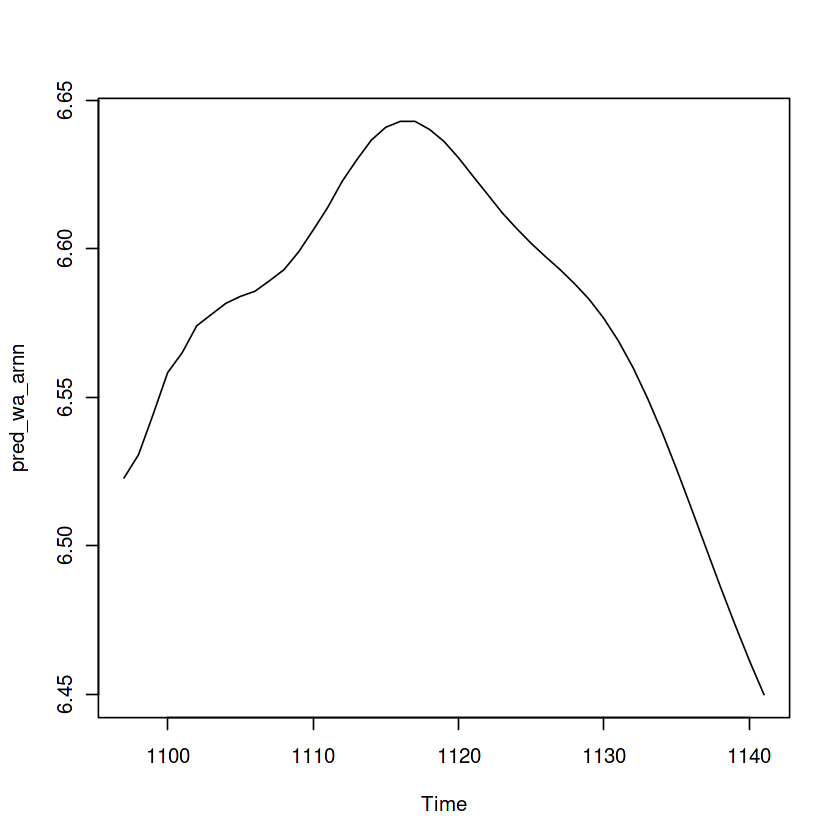

In [55]:
#fitting WARIMA + ARNN hybrid model
fit_wa_ARNN = nnetar(res_wa)
pred_wa_ARNN = forecast::forecast(fit_wa_ARNN, h=length(test))
pred_wa_arnn=fit_wa$Finalforecast+pred_wa_ARNN$mean
a17<-forecast::accuracy(pred_wa_arnn, test);a17
plot(pred_wa_arnn)

smape(test,pred_wa_arnn)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.03253021,0.05106007,0.04194093,-0.5071019,0.6508978,0.8425035,2.564654


[1] 0.006482983

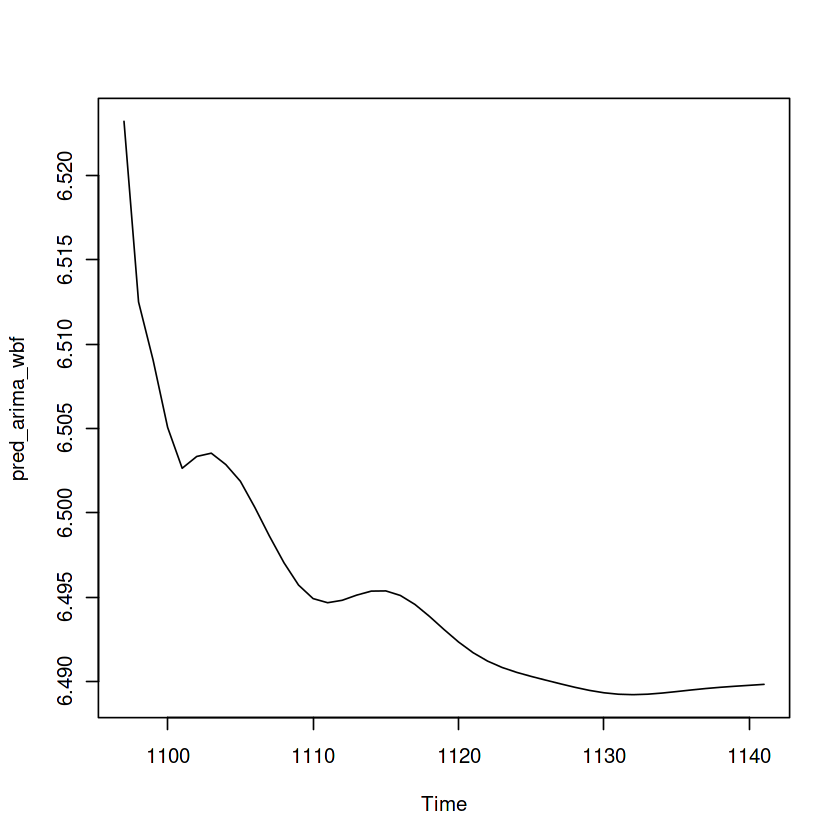

In [56]:
#fitting ARIMA + WARIMA hybrid model
fit_res_wbf=WaveletFittingarma(fitARIMA$residuals, Waveletlevels = floor(log(length(train))), boundary = 'periodic', FastFlag = TRUE, MaxARParam = 5, MaxMAParam = 5, NForecast = length(test))

pred_arima_wbf=predARIMA$mean+fit_res_wbf$Finalforecast
a18<-forecast::accuracy(pred_arima_wbf, test);a18
plot(pred_arima_wbf)

smape(test,pred_arima_wbf)

=-=-=-=-= Iteration 0 Fri Dec 17 10:12:00 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Fri Dec 17 10:12:08 2021 =-=-=-=-=
=-=-=-=-= Iteration 1800 Fri Dec 17 10:12:15 2021 =-=-=-=-=
=-=-=-=-= Iteration 2700 Fri Dec 17 10:12:23 2021 =-=-=-=-=
=-=-=-=-= Iteration 3600 Fri Dec 17 10:12:31 2021 =-=-=-=-=
=-=-=-=-= Iteration 4500 Fri Dec 17 10:12:39 2021 =-=-=-=-=
=-=-=-=-= Iteration 5400 Fri Dec 17 10:12:47 2021 =-=-=-=-=
=-=-=-=-= Iteration 6300 Fri Dec 17 10:12:55 2021 =-=-=-=-=
=-=-=-=-= Iteration 7200 Fri Dec 17 10:13:03 2021 =-=-=-=-=
=-=-=-=-= Iteration 8100 Fri Dec 17 10:13:11 2021 =-=-=-=-=


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1791435,0.2194618,0.1857446,2.774025,2.876051,0.931198,11.08668


[1] 0.02934967

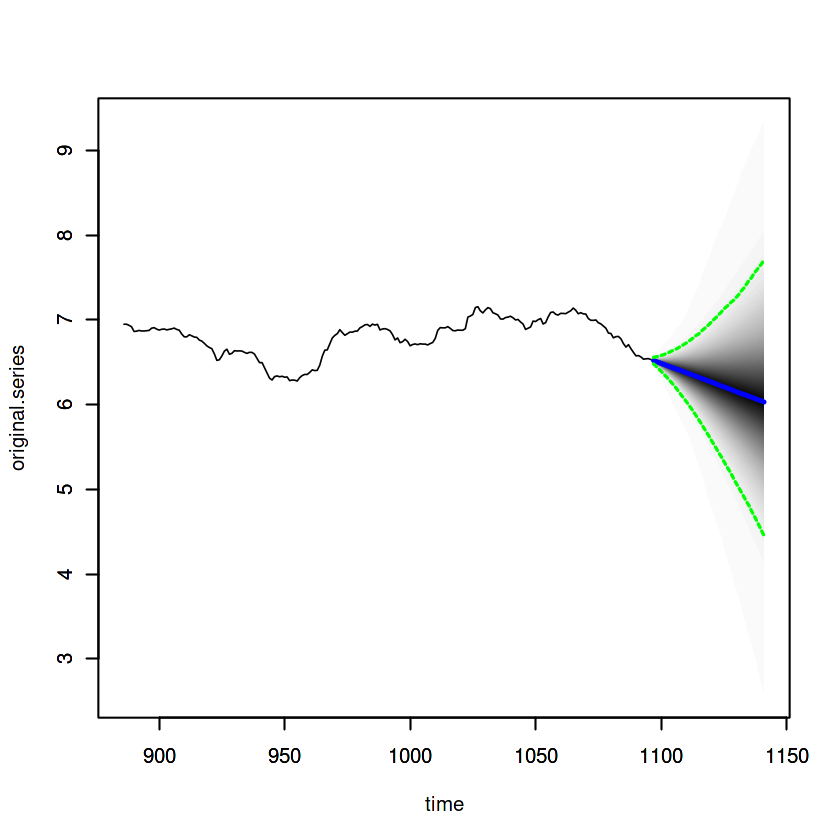

In [57]:
#fitting BSTS model -- Advanced
ss <- AddLocalLinearTrend(list(), train)
fit_bsts=bsts(train,state.specification = ss, niter = 9000)
predBSTS <- predict(fit_bsts, horizon = length(test))
plot(predBSTS, plot.original = 211)

burn <- SuggestBurn(0.1, fit_bsts)
fitted_bsts=as.numeric(-colMeans(fit_bsts$one.step.prediction.errors[-(1:burn),])+train)

a19<-forecast::accuracy(predBSTS$mean, test);a19
smape(test,predBSTS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.06820175,0.07916403,0.07101889,-1.059232,1.102213,0.8471655,3.992822


[1] 0.01094767

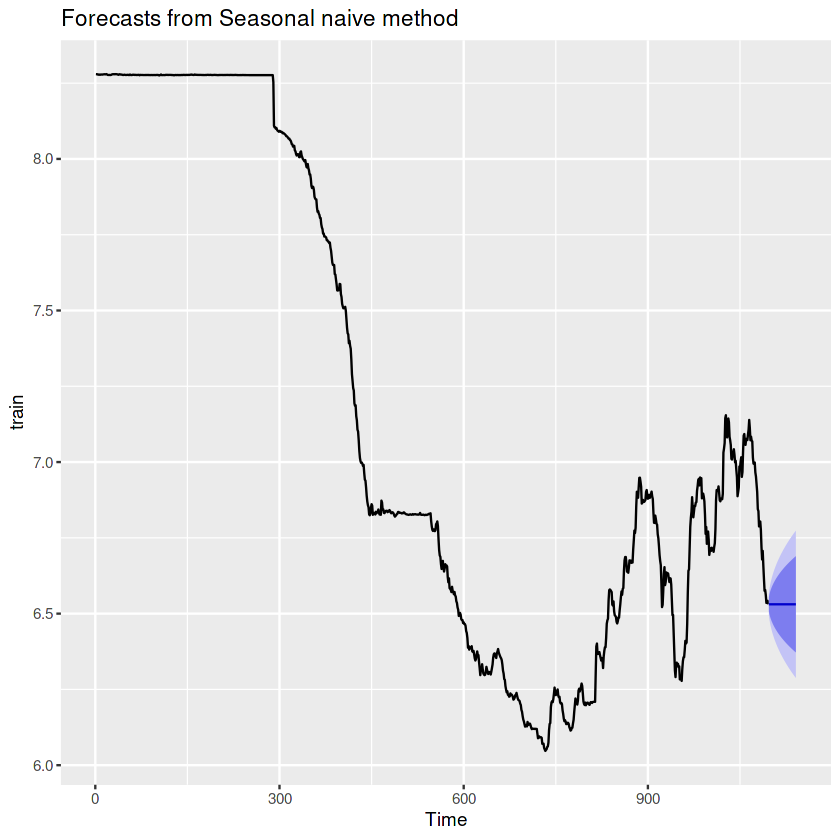

In [58]:
#Snaive - ARIMA(0,0,0)(0,1,0)m  --  Classical
fit_snaive = snaive(train, h=length(test))
autoplot(fit_snaive)

a20<-forecast::accuracy(fit_snaive$mean, test);a20
smape(test,fit_snaive$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.06820288,0.07916501,0.07101987,-1.059249,1.102228,0.8471655,3.99287


[1] 0.01094782

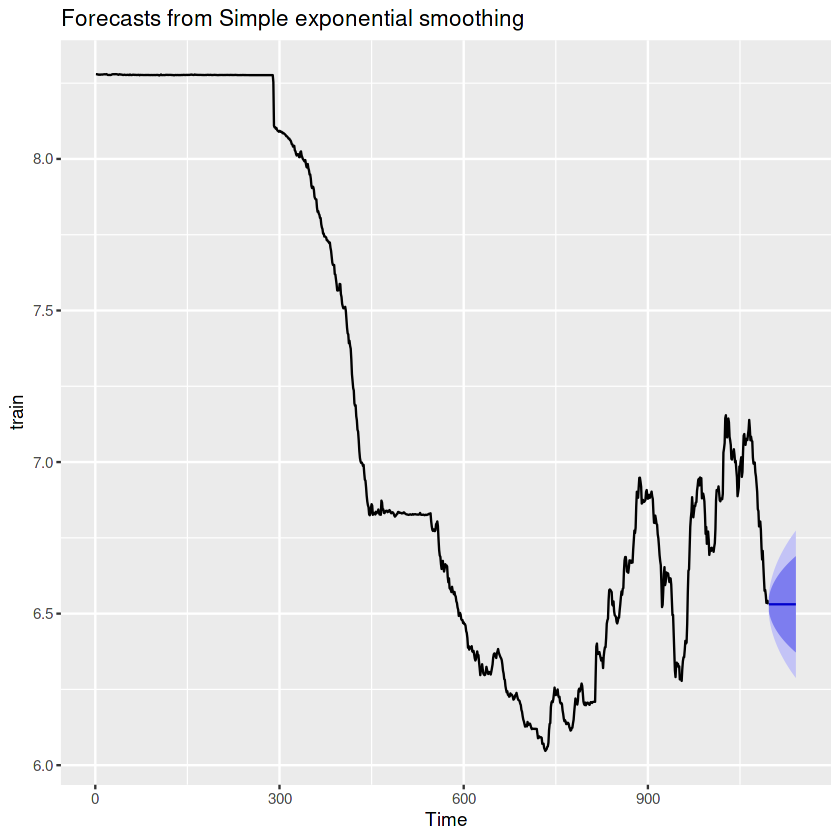

In [61]:
#Ses --  Simple exponential smoothing
fit_ses = ses(train, h=length(test))
autoplot(fit_ses)

a21<-forecast::accuracy(fit_ses$mean, test);a21
smape(test,fit_ses$mean)

In [62]:
#Dynamic regression ARIMA model is discussed in paper 2, 
#but in the fourier, the K (wavenumber) must not be greater than period/2 ,period here is 1 
#m1
# xreg <- fourier(train, K=1)
# model <- auto.arima(train, xreg = xreg, seasonal = FALSE)
# xreg1 <- fourier(train, K=1, h = length(test))
# Pred1 <- forecast(model, xreg = xreg1)
# autoplot(Pred1)

# a22<-forecast::accuracy(Pred1, test);a22
# smape(test,Pred$mean)

**Catboost**

In [63]:
# Importing Catboost
failed_loading_catboost = FALSE
tryCatch(library(catboost), error = function(err) {failed_loading_catboost<<-TRUE})

In [64]:
# Initializing Catboost parameters
lag=2
embedded_series <- NULL
series_means <- NULL
mean <- mean(train)
train_cat <- train/mean
series_means <- c(series_means, mean)
embedded <- embed(train_cat, lag + 1)
embedded_series <- rbind(embedded_series, embedded)

final_lags <- NULL
current_series_final_lags <- t(as.matrix(rev(tail(train_cat, lag))))
final_lags_cat <- rbind(final_lags, current_series_final_lags)

In [65]:
# Fitting the CatBoost model
if (failed_loading_catboost) stop("Error when loading catboost, cannot run global model based on catboost")
    train_pool <- catboost.load_pool(data = as.matrix(embedded_series[,-1]),label=as.matrix(embedded_series[,1]))
    model_cat <- catboost.train(train_pool)

Training catboost with default parameters! See help(catboost.train).



Learning rate set to 0.039659
0:	learn: 0.1074852	total: 52.9ms	remaining: 52.9s
1:	learn: 0.1033974	total: 54.1ms	remaining: 27s
2:	learn: 0.0994604	total: 55.6ms	remaining: 18.5s
3:	learn: 0.0957460	total: 56.7ms	remaining: 14.1s
4:	learn: 0.0921399	total: 57.8ms	remaining: 11.5s
5:	learn: 0.0887677	total: 59ms	remaining: 9.77s
6:	learn: 0.0853774	total: 59.9ms	remaining: 8.49s
7:	learn: 0.0821193	total: 60.9ms	remaining: 7.55s
8:	learn: 0.0789815	total: 62ms	remaining: 6.83s
9:	learn: 0.0759648	total: 63.1ms	remaining: 6.24s
10:	learn: 0.0730369	total: 64.3ms	remaining: 5.78s
11:	learn: 0.0703195	total: 65.6ms	remaining: 5.4s
12:	learn: 0.0676681	total: 66.7ms	remaining: 5.06s
13:	learn: 0.0651166	total: 67.7ms	remaining: 4.77s
14:	learn: 0.0626666	total: 69ms	remaining: 4.53s
15:	learn: 0.0602988	total: 70.1ms	remaining: 4.31s
16:	learn: 0.0580048	total: 70.9ms	remaining: 4.1s
17:	learn: 0.0558094	total: 71.9ms	remaining: 3.92s
18:	learn: 0.0536934	total: 72.7ms	remaining: 3.75s
19

In [66]:
# Predictions in Catboost model
predictions <- NULL
for (i in 1:length(test)){
    catboost_final_lags <- catboost.load_pool(final_lags_cat)
    new_predictions <- catboost.predict(model_cat, catboost_final_lags)
    predictions <- cbind(predictions, new_predictions)
    if(i < length(test)){
      final_lags_cat <- final_lags_cat[-lag]
      final_lags_cat <- cbind(new_predictions, final_lags_cat)
      colnames(final_lags_cat)[1:lag] <- paste("Lag", 1:lag, sep="")
      final_lags_cat <- as.data.frame(final_lags_cat)
    }
  }

pred = list()
for(i in 1:length(test)){
    pred[i] <- predictions[i]
}
pred = as.numeric(pred)
predictions_cat <- pred * as.vector(series_means)

In [67]:
# Catboots Accuracy
smape(test,predictions_cat)
a23<-forecast::accuracy(predictions_cat,test);a23

[1] 0.01087478

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.06744453,0.07877704,0.07054391,-1.047546,1.094828,0.8312762,3.977432


**Pool regression**

In [68]:
# Initializing Pool regression paramters
lag=2
final_lags_poolreg <- final_lags
current_series_final_lags <- t(as.matrix(rev(tail(train_cat, lag))))
final_lags_poolreg <- rbind(final_lags_poolreg, current_series_final_lags)
colnames(final_lags_poolreg)[1:lag] <- paste("Lag", 1:lag, sep="")

embedded_series <- as.data.frame(embedded_series)
colnames(embedded_series)[1] <- "y"
colnames(embedded_series)[2:(lag + 1)] <- paste("Lag", 1:lag, sep = "")

formula <- "y ~ "
  for(predictor in 2:ncol(embedded_series)){
    if(predictor != ncol(embedded_series)){
      formula <- paste0(formula, colnames(embedded_series)[predictor], " + ")
    }else{
      formula <- paste0(formula, colnames(embedded_series)[predictor])
    }
  }

formula <- paste(formula, "+ 0", sep="")
formula <- as.formula(formula)

In [69]:
# Fitting Pool Regression model
model_pool_reg <- glm(formula = formula, data = embedded_series)

In [70]:
# Predictions in Pool regression model
predictions <- NULL
for (i in 1:length(test)){
    new_predictions <- predict.glm(object = model_pool_reg, newdata = as.data.frame(final_lags_poolreg))
    predictions <- cbind(predictions, new_predictions)
    if(i < length(test)){
      final_lags_poolreg <- final_lags_poolreg[-lag]
      final_lags_poolreg <- cbind(new_predictions, final_lags_poolreg)
      colnames(final_lags_poolreg)[1:lag] <- paste("Lag", 1:lag, sep="")
      final_lags_poolreg <- as.data.frame(final_lags_poolreg)
    }
  }

pred = list()
for(i in 1:length(test)){
    pred[i] <- predictions[i]
}
pred <- as.numeric(pred)
predictions_poolreg <- pred * as.vector(series_means)

In [71]:
# Pool regression model accuracy
smape(test,predictions_poolreg)
a24 <- forecast::accuracy(test,predictions_poolreg); a24

[1] 0.00553308

,ME,RMSE,MAE,MPE,MAPE
Test set,0.02755849,0.04563058,0.03579455,0.4245014,0.5512139
